# Financial Fraud Dataset: 
# *Data Cleaning and Data Wrangling* 
___

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot
from random import sample

In [4]:
#Load raw dataset for processing
raw_df = pd.read_csv("/Users/sa14/Desktop/fin eda final/data/BankFraud_Data.csv")

___
##### **The step, nameOrig, IsFlaggedFraud, and nameDest columns will be dropped in the processed dataset. These features were not determined to be useful in the pursuit of accurately detecting and classifying fraudulent activity.**
> * IsFlaggedFraud accounts for only 16 transactions.
> * The nameOrig and nameDest features have no strong correlation fraud.
> * The step column measures time, but this feature has no impact on or correlation to fraudulent activity.
___

In [5]:
#Drop unneeded columns to create the Numeric_BankData.csv file and a processed dataframe
cleaned_df = raw_df.drop(["step", "nameOrig", "isFlaggedFraud", "nameDest"], axis=1)
#cleaned_df.to_csv("Numeric_BankData.csv")

In [7]:

#Create one-hot encoding utilizing get_dummies
encoded_set = pd.get_dummies(cleaned_df, columns=['type'], dtype= int, drop_first= True)

#Save encoded_set as csv
encoded_set.to_csv("/Users/sa14/Desktop/fin eda final/data/Encoded_Set.csv")

In [10]:
#Get count of rows and columns in processed dataframe
encoded_set.shape

(6362620, 10)

In [8]:
#Get the first 10 rows of the encoded_set dataframe
encoded_set.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


___
##### **The "type" feature has been expanded into 4 columns. The CASH_OUT column was left off due to dummy encoding.**
___

In [9]:
#Verify that there are still no null values present in the dataset
encoded_set.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [11]:
#Get details about encoded_set
encoded_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   type_CASH_OUT   int64  
 7   type_DEBIT      int64  
 8   type_PAYMENT    int64  
 9   type_TRANSFER   int64  
dtypes: float64(5), int64(5)
memory usage: 485.4 MB


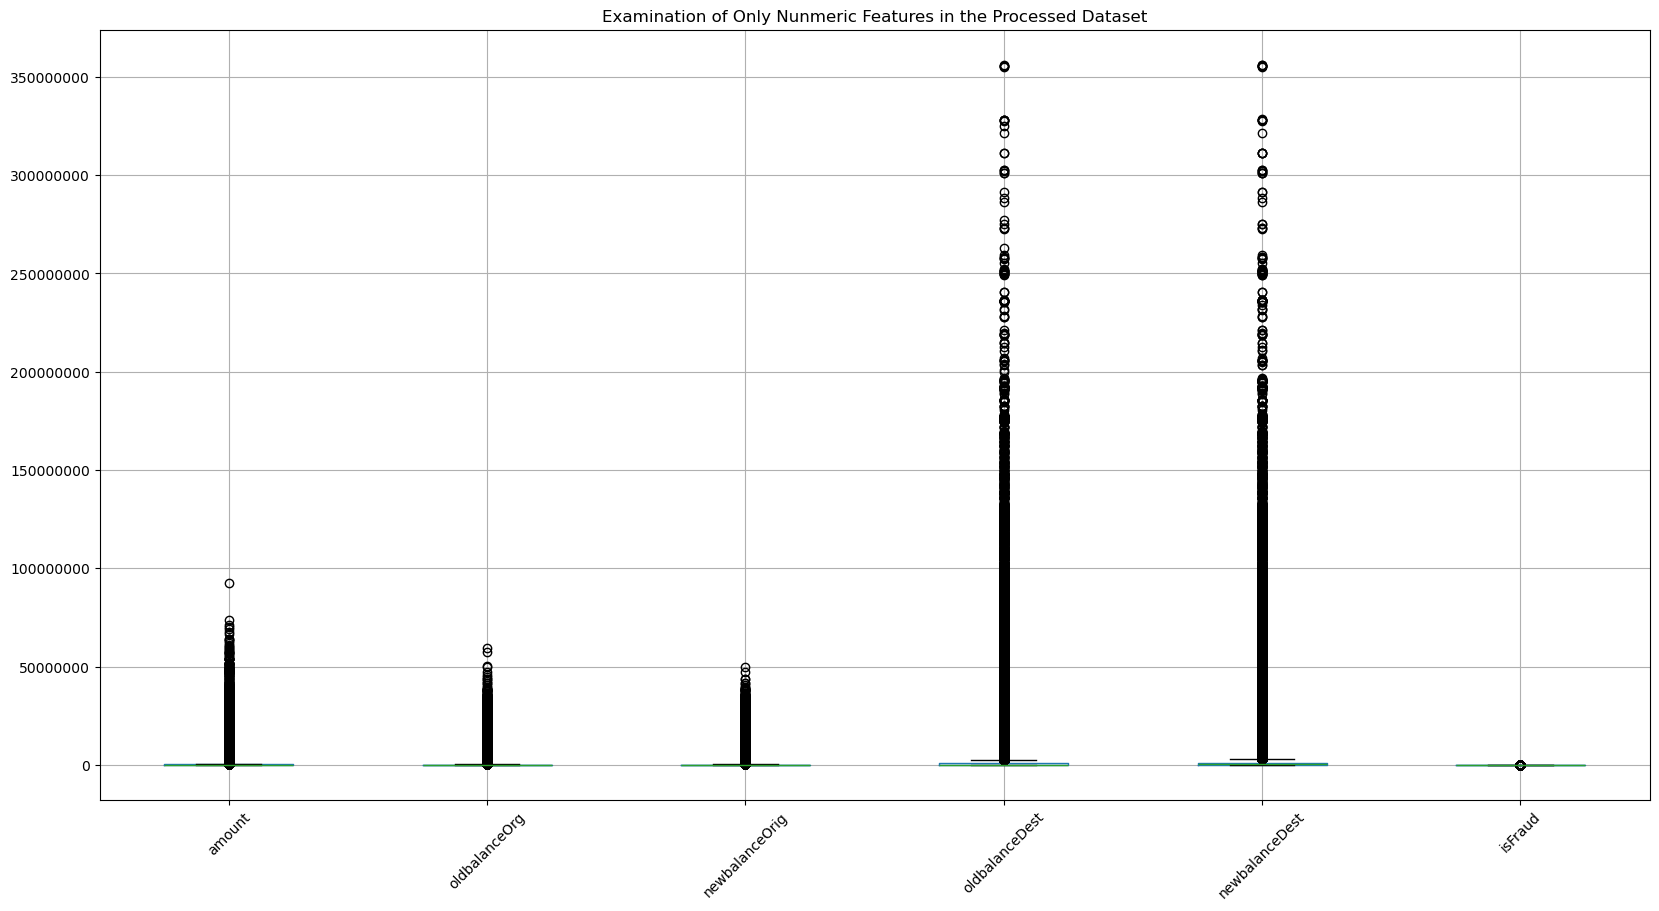

In [14]:
#Check for outliers in encoded_set
plt.figure(figsize=(20,10))
cleaned_df.boxplot(rot=45)
#Remove scientific notation from y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) 
plt.title("Examination of Only Nunmeric Features in the Processed Dataset")
plt.show()

___
##### **As was discovered during the intial analysis, oldbalanceDest & newbalanceDest and  oldbalanceOrig & newbalanceOrig still influence each other. Genuine fraud still accounts for a fraction of overall activity.**
> * There appears to be a small outlier in amount, and oldbalanceDest & newbalanceDest  which is to be expected.
___